In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [15]:
#zaczytaj dane z pliku csv
trainDataFrame = pd.read_csv('train.csv', sep=",")
#sprawdź liczbę kolumn i wierszy
trainDataFrame.shape
trainDataFrame.info()
#wyświetl część tabeli
trainDataFrame.head()
#usuń wiersze z duplikatami id
trainDataFrame.drop_duplicates(subset="ID", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

C:\Users\marci\AppData\Local\Temp\ipykernel_2352\3295783189.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  trainDataFrame = pd.read_csv('train.csv', sep=",")


ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
**************************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
**************************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
**************************************************
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Lengt

<Axes: xlabel='count', ylabel='Credit_Score'>

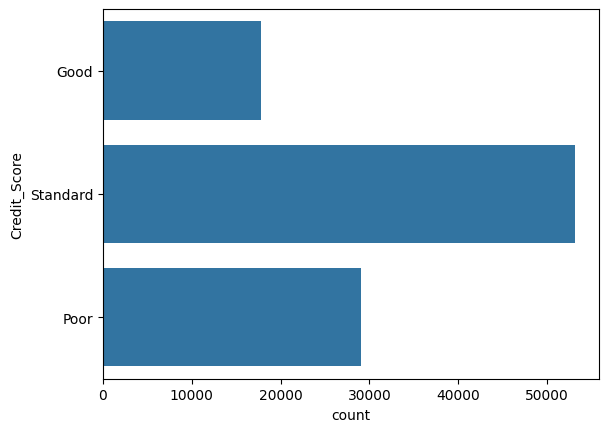

In [16]:
#opisz statystyki danych
trainDataFrame.describe()
#zlicz różne wartości danych
for i in trainDataFrame.columns:
    print(trainDataFrame[i].value_counts())
    print('*'*50)
# pokaż liczności danych kategorycznych
sns.countplot(trainDataFrame['Credit_Score'])
#zastąp błędne dane 

In [17]:
trainDataFrame.info()
#zmień dane na numeryczne
FeaturesToConvert = ['Age','Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
# ale najpierw sprawdź czy nie ma błędów w danych
for feature in FeaturesToConvert:
    uniques = trainDataFrame[feature].unique()
    print(feature, uniques)
# usuń zbędne znaki '-’ , '_'
for feature in FeaturesToConvert:
    trainDataFrame[feature] = trainDataFrame[feature].str.strip('-_')
# puste kolumny zastąp NAN
for feature in FeaturesToConvert:
    trainDataFrame[feature] = trainDataFrame[feature].replace({'':np.nan})
# zmien typ zmiennych ilościowych
for feature in FeaturesToConvert:
    trainDataFrame[feature] = trainDataFrame[feature].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [18]:
#uzupełnij braki średnią
trainDataFrame['Monthly_Inhand_Salary']= trainDataFrame['Monthly_Inhand_Salary'].fillna(method='pad')

C:\Users\marci\AppData\Local\Temp\ipykernel_2352\1709834052.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trainDataFrame['Monthly_Inhand_Salary']= trainDataFrame['Monthly_Inhand_Salary'].fillna(method='pad')


In [19]:
# List of columns to drop
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']

for column in columns_to_drop:
    if column in trainDataFrame.columns:
        trainDataFrame.drop(column, inplace=True, axis=1)
    else:
        print(f"Column {column} does not exist in the DataFrame")


In [20]:
print(trainDataFrame.dtypes)

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [21]:
def convert_to_days(duration_str):
    # Check if the input is a string
    if isinstance(duration_str, str):
        # Parse years and months from the string
        years, months = map(int, duration_str.lower().replace('years', '').replace('and', '').replace('months', '').split())

        # Convert years and months to days
        days = years * 365 + months * 30
    else:
        # If the input is not a string, return NaN
        days = np.nan

    return days

# Apply the conversion to the 'Credit_History_Age' column
trainDataFrame['Credit_History_Age'] = trainDataFrame['Credit_History_Age'].apply(convert_to_days)

In [22]:
def extract_capitals(s):
    return ''.join([c for c in s if c.isupper()])
trainDataFrame['Payment_Behaviour'] = trainDataFrame['Payment_Behaviour'].apply(extract_capitals)


In [23]:
for column in trainDataFrame.columns:
    trainDataFrame[column] = pd.to_numeric(trainDataFrame[column], errors='ignore')

C:\Users\marci\AppData\Local\Temp\ipykernel_2352\1591142561.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  trainDataFrame[column] = pd.to_numeric(trainDataFrame[column], errors='ignore')


In [24]:
for column in trainDataFrame.columns:
    if pd.api.types.is_numeric_dtype(trainDataFrame[column]):
        Q1 = trainDataFrame[column].quantile(0.25)
        Q3 = trainDataFrame[column].quantile(0.75)
        IQR = Q3 - Q1

        filter = (trainDataFrame[column] >= Q1 - 1.5 * IQR) & (trainDataFrame[column] <= Q3 + 1.5 * IQR)
        trainDataFrame = trainDataFrame.loc[filter]  

In [25]:
from sklearn.preprocessing import LabelEncoder
# stwórz obiekt enkodera
le = LabelEncoder()
for column in trainDataFrame.columns:
    if pd.api.types.is_object_dtype(trainDataFrame[column]):
        trainDataFrame[column] = le.fit_transform(trainDataFrame[column])
# sprawdź transformacje
trainDataFrame.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4.0,98,3,...,3,809.98,26.822620,8060.0,1,49.574949,80.415295,3,312.494089,0
3,23.0,12,19114.12,1824.843333,3,4,3,4.0,98,5,...,1,809.98,31.377862,8150.0,1,49.574949,199.458074,6,223.451310,0
5,23.0,12,19114.12,1824.843333,3,4,3,4.0,98,8,...,1,809.98,27.262259,8210.0,1,49.574949,62.430172,0,340.479212,0
6,23.0,12,19114.12,1824.843333,3,4,3,4.0,98,3,...,1,809.98,22.537593,8240.0,1,49.574949,178.344067,6,244.565317,0
8,28.0,15,34847.84,3037.986667,2,4,6,1.0,507,3,...,1,605.03,24.464031,9700.0,1,18.816215,104.291825,6,470.690627,2
